<a href="https://colab.research.google.com/github/myke11j/create-dataset-from-google-search/blob/master/create_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download libraries

In [1]:
!pip install google_images_download
!sudo apt-get install chromium-chromedriver

     |████████████████████████████████| 911kB 7.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 4 not upgraded.
Need to get 70.1 MB of archives.
After this operation, 257 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 75.0.3770.90-0ubuntu0.18.04.1 [1,112 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 75.0

# Import Libraries

I'm using fast.ai to view the images but it can be done using any library.

In [0]:
from fastai import *
from fastai.vision import *

In [58]:
!mkdir custom_data
!ls

baseball     example_submission.csv  new_data	  train
custom_data  fer2013.tar.gz	     sample_data


In [0]:
keyword = 'traffic signal real'
path = 'custom_data/train/'

In [62]:
!googleimagesdownload -k 'traffic signal real' -s medium -l 100 -o custom_data/ -i train/ --chromedriver /usr/bin/chromedriver


Item no.: 1 --> Item name = traffic signal real
Evaluating...
Starting Download...
Completed Image ====> 1.Future-of-Traffic-Lights-2.jpg
Completed Image ====> 2.virtualtrafficlights.jpg
Completed Image ====> 3.Traffic-Signals-800x832.jpg
Completed Image ====> 4.trafficlight.jpg
Completed Image ====> 5.Real-Traffic-Signal-Light-Red-Yellow-Green-12.jpg
Completed Image ====> 6.red_light_shutterstock_108272354-1483043069-3780-1486416365-8372.jpg
Completed Image ====> 7.BcgrdLBKi.jpg
Completed Image ====> 8.traffic-light-lamp-1.jpg
Completed Image ====> 9.s-l640.jpg
Completed Image ====> 10.Real-Traffic-Signal-Light-Retired-Red-Ylw-Green.jpg
Completed Image ====> 11.traffic-light-1024_159700k.jpg
Completed Image ====> 12.aid369365-v4-728px-Trigger-Green-Traffic-Lights-Step-3-Version-3.jpg
Completed Image ====> 13.traffic_light-stress.png
Completed Image ====> 14.traffic-signal-amber-500x500.jpg
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Completed Image ====

In [63]:
! cd custom_data && ls

keyword  train


In [66]:
images = get_image_files(path)
images[0:5]

[PosixPath('custom_data/train/52.Real-Traffic-Signal-Light-Retired-Red-Ylw-Grn.jpg'),
 PosixPath('custom_data/train/68.stock-photo-road-sky-street-sign-pedestrian-traffic-signal-buildings-icon-2b727ac0-32a6-4d48-a861-a2864fe05b5b.jpg'),
 PosixPath('custom_data/train/10.Real-Traffic-Signal-Light-Retired-Red-Ylw-Green.jpg'),
 PosixPath('custom_data/train/32.346.jpg'),
 PosixPath('custom_data/train/71.TrafficSignals_11.jpg')]

In [67]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', valid_pct=None, seed:int=None, classes:Collection=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [68]:
tfms = get_transforms(do_flip=False)
data = (ImageList.from_folder(path) 
        .random_split_by_pct() 
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [69]:
data

ImageDataBunch;

Train: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
train,train,train,train,train
Path: custom_data/train;

Valid: LabelList (17 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
train,train,train,train,train
Path: custom_data/train;

Test: None

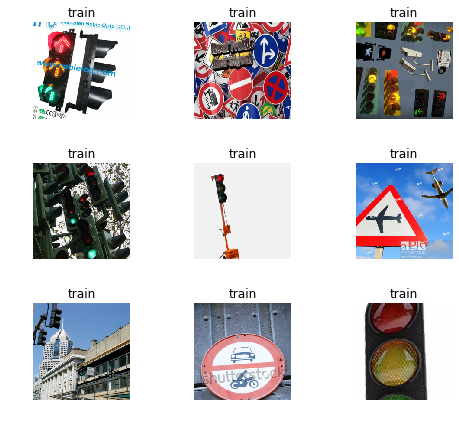

In [70]:
data.show_batch(rows=3, figsize=(7,6))
